## Intro

Based on several research papers we have read we found out that there are 3 groups of sound features that get affected by the Parkinson Disease: Phonation, articulation and prosody.


We will start extracting the phonation features that get affected by the parkinson disease based on (1):

Feature                      |            Effect

Jitter                        |    Higher in PD than healthy

Shimmer                        |   Higher in PD than healthy

Harmonics-to-noise ratio        |  Lower in PD than in healthy

Correlation Dimension (D2)       | Higher in PD than in healthy

Pitch Period Entropy              |Higher in PD than in healthy

Cepstral Peak Prominence          | Lower in PD than in healthy	

Vowel Space Area                 |  Lower in PD than in healthy	

Vowel Articulation Index        |Lower in PD than in healthy

## Pre-Processing

The code in the following 2 blocks converts my SharePoint link(one drive) into a direct download URL, downloads the ZIP dataset into Colab, and confirms that the file was saved successfully.

In [ ]:
share_link = "https://mailaub-my.sharepoint.com/:u:/g/personal/bmh26_mail_aub_edu/IQD9JQDAG4BuSpOoitA1ic22AZvWDotqxuJxYq91-vfjReU?e=h6UnxO"


In [ ]:
out_path = "/content/phonation_audios.zip"

direct = share_link + ("&download=1" if "?" in share_link else "?download=1")
!wget -O "{out_path}" -L "{direct}"
!ls -lh "{out_path}"


--2025-12-08 06:06:07--  https://mailaub-my.sharepoint.com/:u:/g/personal/bmh26_mail_aub_edu/IQD9JQDAG4BuSpOoitA1ic22AZvWDotqxuJxYq91-vfjReU?e=h6UnxO&download=1
Resolving mailaub-my.sharepoint.com (mailaub-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to mailaub-my.sharepoint.com (mailaub-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/bmh26_mail_aub_edu/Documents/project%20490/dataset/phonation%20audios.zip?ga=1 [following]
--2025-12-08 06:06:08--  https://mailaub-my.sharepoint.com/personal/bmh26_mail_aub_edu/Documents/project%20490/dataset/phonation%20audios.zip?ga=1
Reusing existing connection to mailaub-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 288922124 (276M) [application/x-zip-compressed]
Saving to: ‘/content/phonation_audios.zip’

/content/phonation_ 100%[===================>] 275.54M  72.3MB/s    in 6.1s    

2025-12-08 06:06:15 (

Unzips phonation_audios.zip into /content/phonation_extracted and prints the top-level folder(s) there.

In [ ]:
import zipfile
from pathlib import Path

zip_path = Path("/content/phonation_audios.zip")
extract_root = Path("/content/phonation_extracted")
extract_root.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_root)

print("Extracted to:", extract_root)
print("Top-level folders/files:", [p.name for p in extract_root.iterdir()])


Extracted to: /content/phonation_extracted
Top-level folders/files: ['phonation audios']


Searches inside /content/phonation_extracted for the folder whose subfolders are A, I, O, U, E, then prints that “base” folder and its contents.

In [ ]:
from pathlib import Path

extract_root = Path("/content/phonation_extracted")
vowels = {"A", "I", "O", "U", "E"}

base = None
for d in [p for p in extract_root.rglob("*") if p.is_dir()]:
    child_dirs = {c.name for c in d.iterdir() if c.is_dir()}
    if vowels.issubset(child_dirs):
        base = d
        break

assert base is not None, "Couldn't find a folder that contains a/i/o/u/e."
print("Base folder (contains vowels):", base)
print("Inside base:", [p.name for p in base.iterdir()])


Base folder (contains vowels): /content/phonation_extracted/phonation audios
Inside base: ['O', 'I', 'A', 'E', 'U']


This block scans each vowel folder for .wav files, prints how many it found and first 10recordings names, and for every vowel picks one PD file and one HC file (if they exist) and saves their paths.

In [ ]:
from pathlib import Path

audio_exts = {".wav"}
selected = {}

for v in ["A", "I", "O", "U", "E"]:
    folder = base / v

    files = sorted([
        p for p in folder.rglob("*")
        if p.is_file() and p.suffix.lower() in audio_exts
    ]) if folder.exists() else []

    print(f"\n{v}: {len(files)} audio files")
    print("  first 10:", [p.name for p in files[:10]])

    # pick 1 PD and 1 HC (case-insensitive)
    pd_files = [p for p in files if p.name.upper().startswith("PD")]
    hc_files = [p for p in files if p.name.upper().startswith("HC")]

    pd_pick = pd_files[0] if pd_files else None
    hc_pick = hc_files[0] if hc_files else None

    selected[v] = {"PD": pd_pick, "HC": hc_pick}

    print("  PD picked:", pd_pick.name if pd_pick else "NOT FOUND")
    print("  HC picked:", hc_pick.name if hc_pick else "NOT FOUND")



A: 243 audio files
  first 10: ['HC_A1_0034.wav', 'HC_A1_0036.wav', 'HC_A1_0045.wav', 'HC_A1_0048.wav', 'HC_A1_0049.wav', 'HC_A1_0051.wav', 'HC_A1_0052.wav', 'HC_A1_0053.wav', 'HC_A1_0054.wav', 'HC_A1_0055.wav']
  PD picked: PD_A1_0004.wav
  HC picked: HC_A1_0034.wav

I: 229 audio files
  first 10: ['HC_I1_0034.wav', 'HC_I1_0036.wav', 'HC_I1_0045.wav', 'HC_I1_0048.wav', 'HC_I1_0049.wav', 'HC_I1_0051.wav', 'HC_I1_0052.wav', 'HC_I1_0053.wav', 'HC_I1_0054.wav', 'HC_I1_0055.wav']
  PD picked: PD_I1_0004.wav
  HC picked: HC_I1_0034.wav

O: 233 audio files
  first 10: ['HC_O1_0034.wav', 'HC_O1_0036.wav', 'HC_O1_0045.wav', 'HC_O1_0048.wav', 'HC_O1_0049.wav', 'HC_O1_0051.wav', 'HC_O1_0052.wav', 'HC_O1_0053.wav', 'HC_O1_0054.wav', 'HC_O1_0055.wav']
  PD picked: PD_O1_0004.wav
  HC picked: HC_O1_0034.wav

U: 131 audio files
  first 10: ['HC_U1_0034.wav', 'HC_U1_0036.wav', 'HC_U1_0045.wav', 'HC_U1_0048.wav', 'HC_U1_0049.wav', 'HC_U1_0051.wav', 'HC_U1_0052.wav', 'HC_U1_0053.wav', 'HC_U1_0054.wav'

install library

In [ ]:
!pip -q install librosa


This block defines a function that loads an audio file and plots its spectrogram, then loops over the selected PD/HC files from previous block for each vowel and displays their spectrograms.


===== A =====
Spectrogram for: PD -> PD_A1_0004.wav


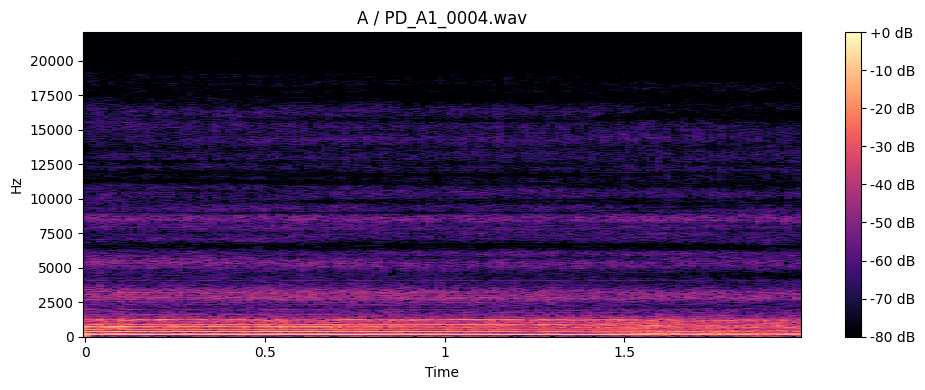

Spectrogram for: HC -> HC_A1_0034.wav


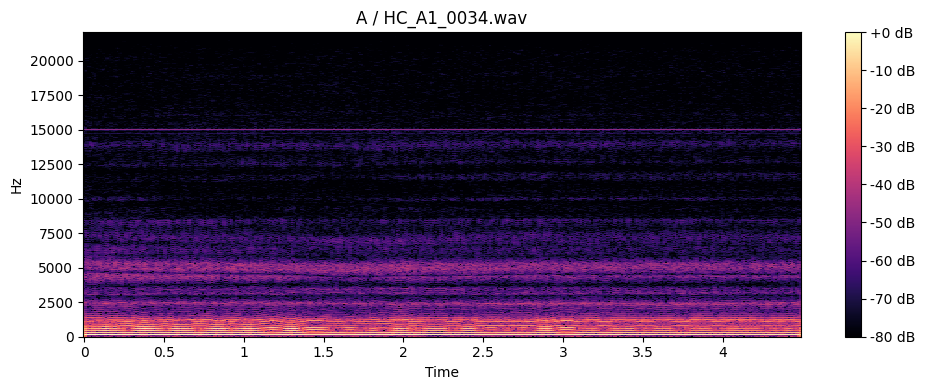


===== I =====
Spectrogram for: PD -> PD_I1_0004.wav


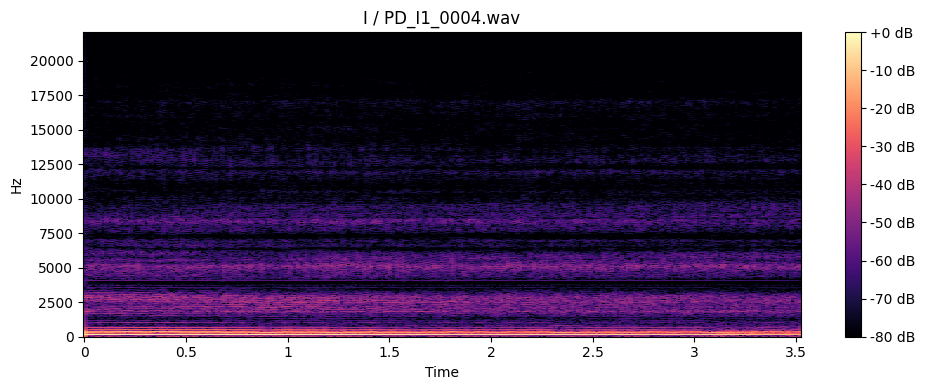

Spectrogram for: HC -> HC_I1_0034.wav


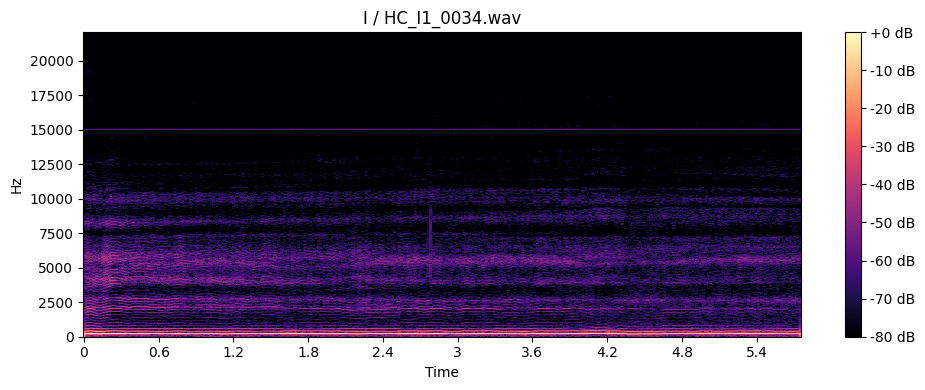


===== O =====
Spectrogram for: PD -> PD_O1_0004.wav


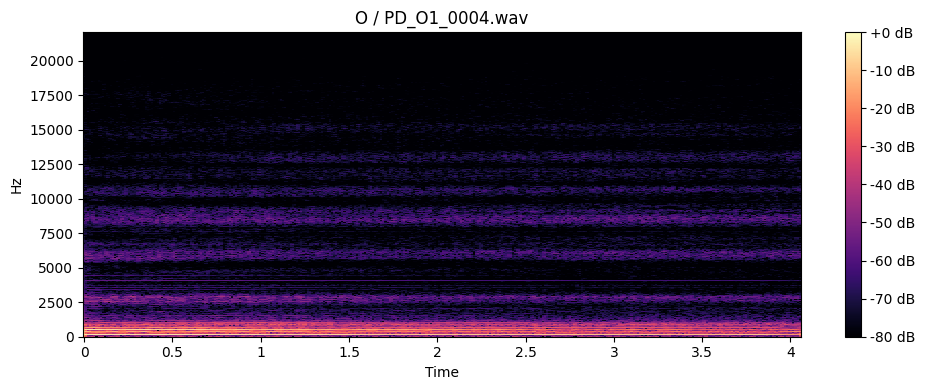

Spectrogram for: HC -> HC_O1_0034.wav


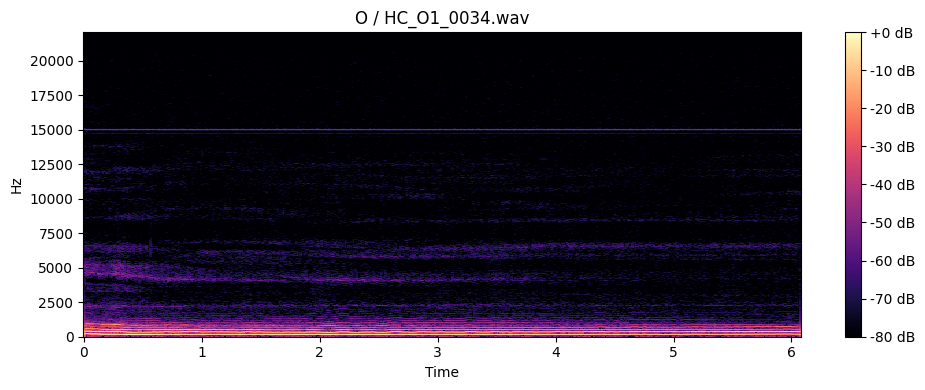


===== U =====
Spectrogram for: PD -> PD_U1_0004.wav


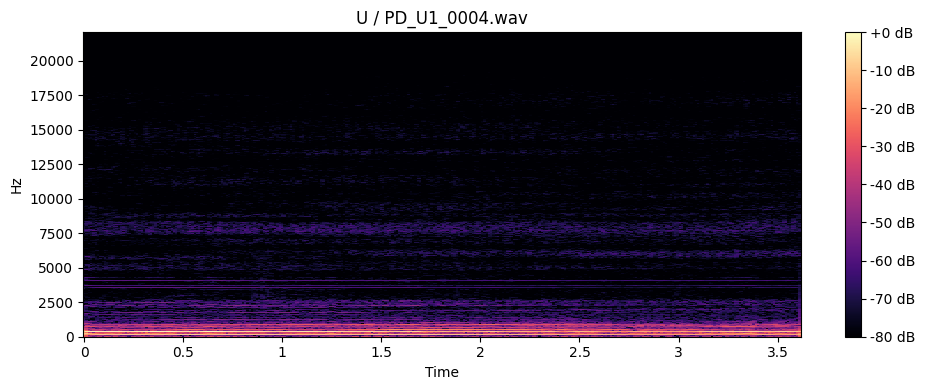

Spectrogram for: HC -> HC_U1_0034.wav


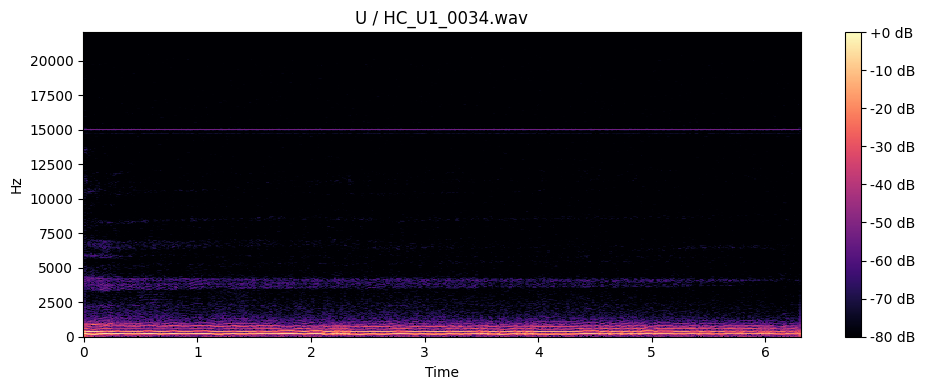


===== E =====
Spectrogram for: PD -> PD_E1_0004.wav


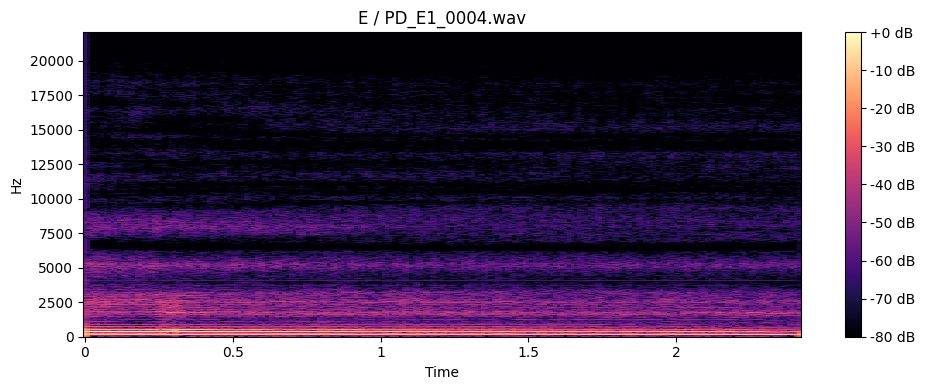

Spectrogram for: HC -> HC_E1_0105.wav


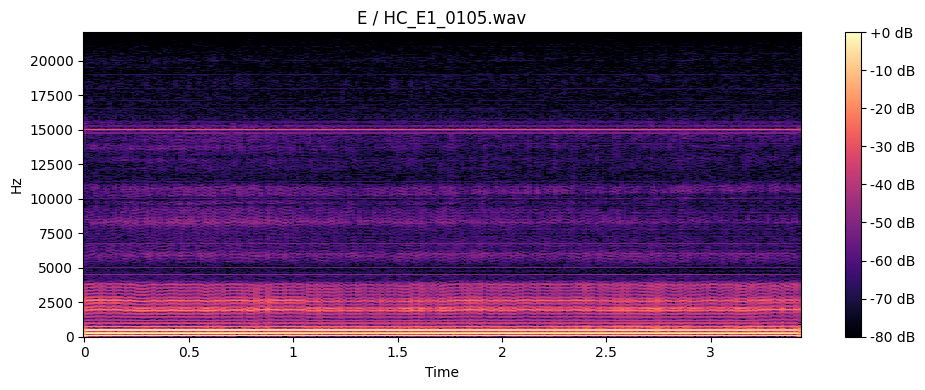

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram(audio_path, n_fft=2048, hop_length=512):
    audio_path = str(audio_path)  # important: Path -> string
    y, sr = librosa.load(audio_path, sr=None)
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis="time", y_axis="hz")
    plt.colorbar(format="%+2.0f dB")
    plt.title(audio_path.split("/")[-2] + " / " + audio_path.split("/")[-1])
    plt.tight_layout()
    plt.show()

for v, pair in selected.items():                 # pair is {"PD": Path, "HC": Path}
    print(f"\n===== {v} =====")
    for label, p in pair.items():               # label is "PD"/"HC"
        if p is None:
            print(f"Spectrogram for: {label} -> NOT FOUND")
            continue
        print(f"Spectrogram for: {label} -> {p.name}")
        plot_spectrogram(p)


This block defines a function that plots a zoomed spectrogram of an audio file,I limited the displayed frequency range (0–1200).

Then we use this function to zoom into the spectrograms of the selected audios.

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram_zoom(audio_path, n_fft=2048, hop_length=512,
                          fmin=0, fmax=1000, tmin=None, tmax=None):
    y, sr = librosa.load(str(audio_path), sr=None)

    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length,
                             x_axis="time", y_axis="hz")
    plt.colorbar(format="%+2.0f dB")

    plt.ylim(fmin, min(fmax, sr/2))  # zoom frequency

    if tmin is not None or tmax is not None:  # optional zoom time
        if tmin is None: tmin = 0
        if tmax is None: tmax = len(y) / sr
        plt.xlim(tmin, tmax)

    plt.title(f"Zoom {int(fmin)}–{int(min(fmax, sr/2))} Hz | {audio_path.parent.name}/{audio_path.name}")
    plt.tight_layout()
    plt.show()



===== A (zoomed) =====
PD: PD_A1_0004.wav


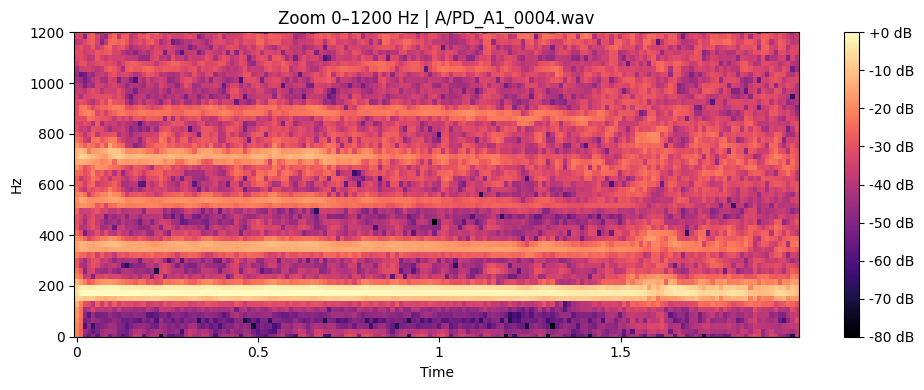

HC: HC_A1_0034.wav


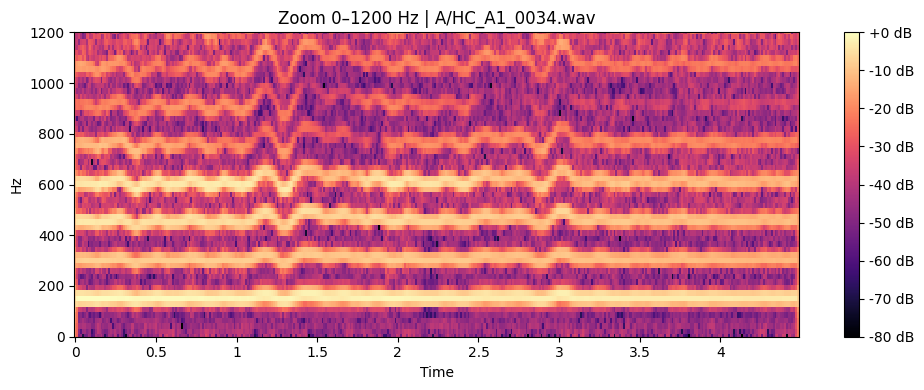


===== I (zoomed) =====
PD: PD_I1_0004.wav


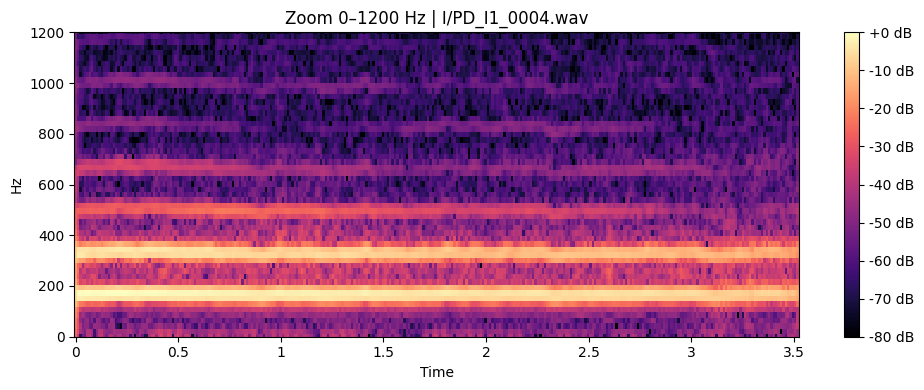

HC: HC_I1_0034.wav


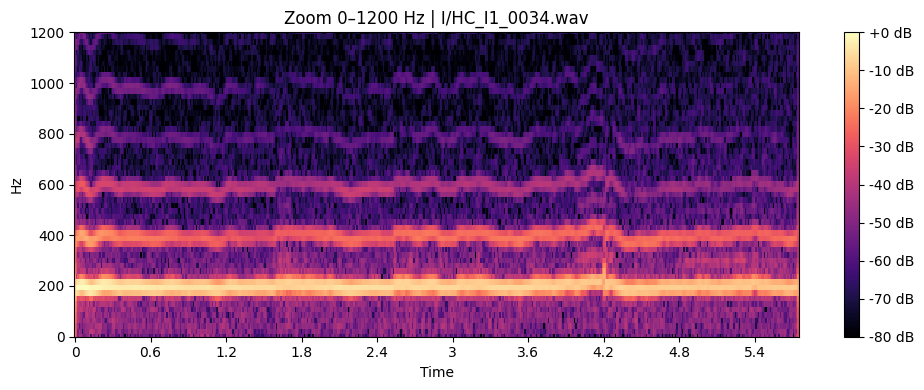


===== O (zoomed) =====
PD: PD_O1_0004.wav


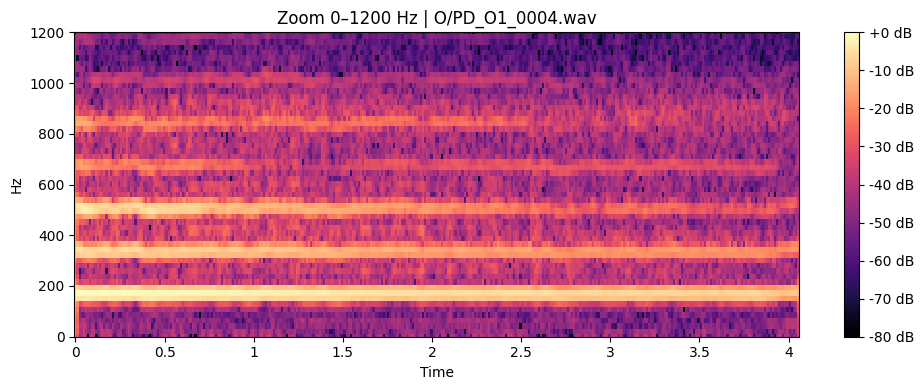

HC: HC_O1_0034.wav


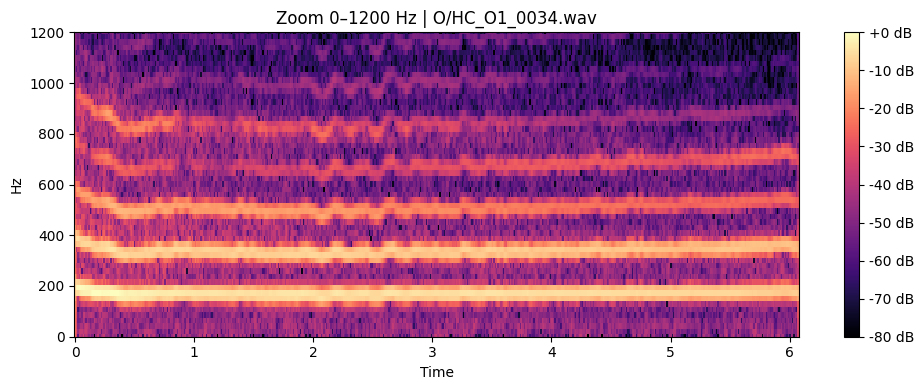


===== U (zoomed) =====
PD: PD_U1_0004.wav


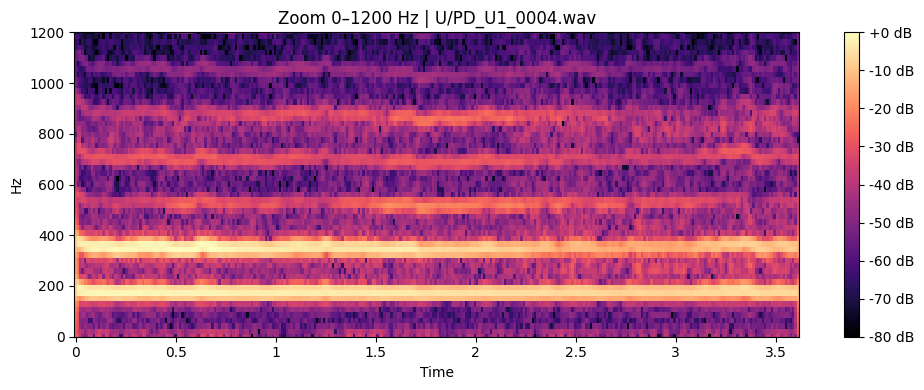

HC: HC_U1_0034.wav


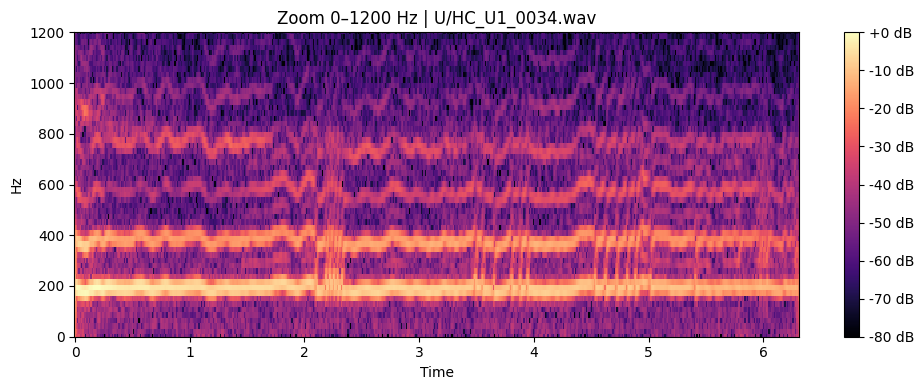


===== E (zoomed) =====
PD: PD_E1_0004.wav


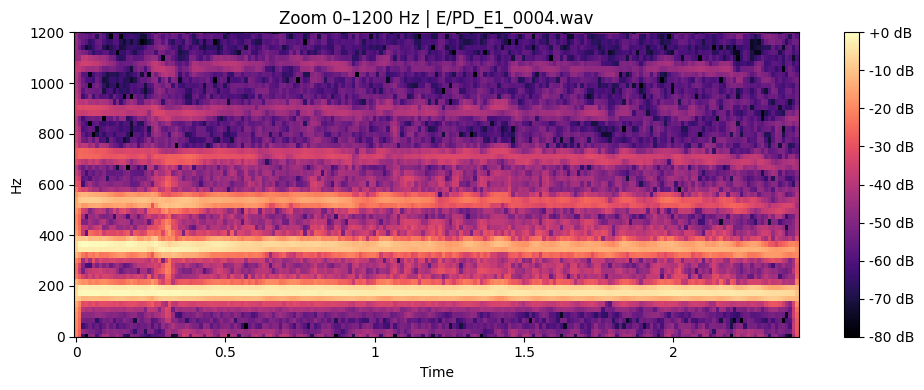

HC: HC_E1_0105.wav


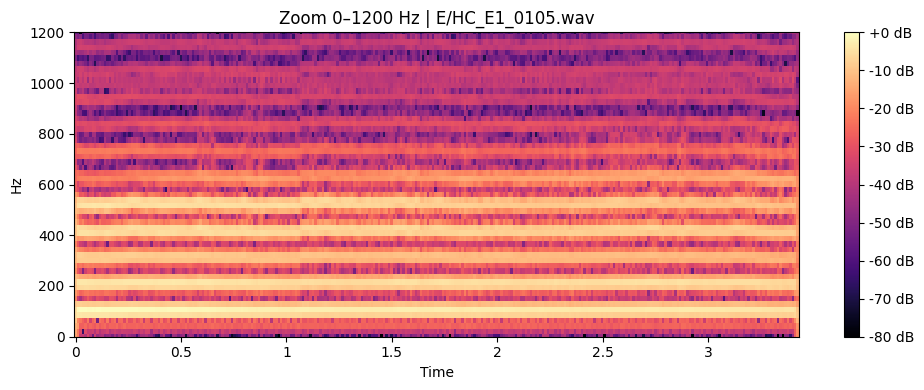

In [ ]:
FMIN = 0
FMAX = 1200

for vowel, pair in selected.items():          # pair is {"PD": Path/None, "HC": Path/None}
    print(f"\n===== {vowel} (zoomed) =====")
    for label, p in pair.items():
        if p is None:
            print(f"{label}: NOT FOUND")
            continue
        print(f"{label}: {p.name}")
        plot_spectrogram_zoom(p, fmin=FMIN, fmax=FMAX)


Based on the spectograms observations we will take 50 as frequency floor and ceiling of 4000

installing library

In [ ]:
!pip install praat-parselmouth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 42.7 MB/s eta 0:00:00


## Jitter

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
import parselmouth
from parselmouth.praat import call


In [ ]:
PITCH_FLOOR = 50
PITCH_CEILING = 4000


In [ ]:
AUDIO_DIR = Path("/content/phonation_extracted/phonation audios/A")
OUTPUT_CSV = "jitter_features.csv"

loop over all vowels and put their audios in lists and then store these lists in a dictionnary.

In [ ]:
from pathlib import Path

vowels = ["A", "I", "O", "U", "E"]
audio_exts = {".wav"}

vowel_files = {}
for v in vowels:
    folder = base / v
    files = sorted([p for p in folder.rglob("*") if p.is_file() and p.suffix.lower() in audio_exts]) if folder.exists() else []
    vowel_files[v] = files
    print(v, "->", len(files), "wav files")


A -> 243 wav files
I -> 229 wav files
O -> 233 wav files
U -> 131 wav files
E -> 199 wav files


Pitch = fundamental frequency (F0) of the voice.


Jitter measures tiny cycle-to-cycle variations in this F0, so good jitter needs accurate pitch estimates.


First: For every WAV, we estimate F0 over time with a wide range (50–600 Hz) and store each file’s min, max, and mean F0 in a DataFrame.


Second: We summarize F0 stats and use the 5th percentile of min_f0 and 95th percentile of max_f0 to define a robust pitch range, avoiding extreme noisy outliers(unvoiced parts, noise,....).


Third: We plot a histogram of mean F0 to visually check that our chosen pitch range covers the real F0 distribution.

In [ ]:
import librosa
import numpy as np
import pandas as pd

# Wide search range for exploration
FMIN_SEARCH = 50    # Hz
FMAX_SEARCH = 600   # Hz

pitch_rows = []

for v, files in vowel_files.items():
    print(f"Processing vowel {v}, {len(files)} files...")
    for wav in files:
        try:
            y, sr = librosa.load(str(wav), sr=None)
            # Estimate F0 over time
            f0 = librosa.yin(y, fmin=FMIN_SEARCH, fmax=FMAX_SEARCH, sr=sr)

            # Remove unvoiced frames (0 or negative)
            f0 = f0[f0 > 0]

            if len(f0) == 0:
                continue  # skip fully unvoiced / silent files

            pitch_rows.append({
                "vowel": v,
                "file": wav.name,
                "min_f0": float(np.min(f0)),
                "max_f0": float(np.max(f0)),
                "mean_f0": float(np.mean(f0))
            })
        except Exception as e:
            print("Error with file:", wav, "->", e)

# Put everything in a DataFrame
df_f0 = pd.DataFrame(pitch_rows)
df_f0.head()


Processing vowel A, 243 files...
Processing vowel I, 229 files...
Processing vowel O, 233 files...
Processing vowel U, 131 files...
Processing vowel E, 199 files...


vowel            file      min_f0      max_f0     mean_f0
0     A  HC_A1_0034.wav  145.187954  165.881086  154.269031
1     A  HC_A1_0036.wav  224.535270  235.879162  229.972669
2     A  HC_A1_0045.wav   88.708865   93.908676   91.108059
3     A  HC_A1_0048.wav  120.279730  125.549476  122.916652
4     A  HC_A1_0049.wav  190.553272  203.300607  195.685034

In [ ]:
# Basic summary
print(df_f0[["min_f0", "max_f0", "mean_f0"]].describe())

# Percentiles (for more robust limits)
p5_min  = df_f0["min_f0"].quantile(0.05)
p95_max = df_f0["max_f0"].quantile(0.95)

print("\n5th percentile of min_f0:", p5_min)
print("95th percentile of max_f0:", p95_max)

# Suggest safe bounds (rounded a bit)
suggested_min_pitch = max(40, p5_min - 10)
suggested_max_pitch = p95_max + 10

print("\nSuggested pitch search range for Praat/Parselmouth:")
print(f"MIN_PITCH ≈ {suggested_min_pitch:.1f} Hz")
print(f"MAX_PITCH ≈ {suggested_max_pitch:.1f} Hz")


            min_f0       max_f0      mean_f0
count  1035.000000  1035.000000  1035.000000
mean    138.014663   179.401218   159.428400
std      49.453312    71.010921    42.943033
min      50.000000    69.454989    66.550381
25%     107.416079   130.522016   122.714810
50%     132.865843   172.727571   158.054921
75%     173.139814   207.897080   191.434490
max     316.958048   604.109589   319.850408

5th percentile of min_f0: 52.27018861616811
95th percentile of max_f0: 261.9271240961059

Suggested pitch search range for Praat/Parselmouth:
MIN_PITCH ≈ 42.3 Hz
MAX_PITCH ≈ 271.9 Hz


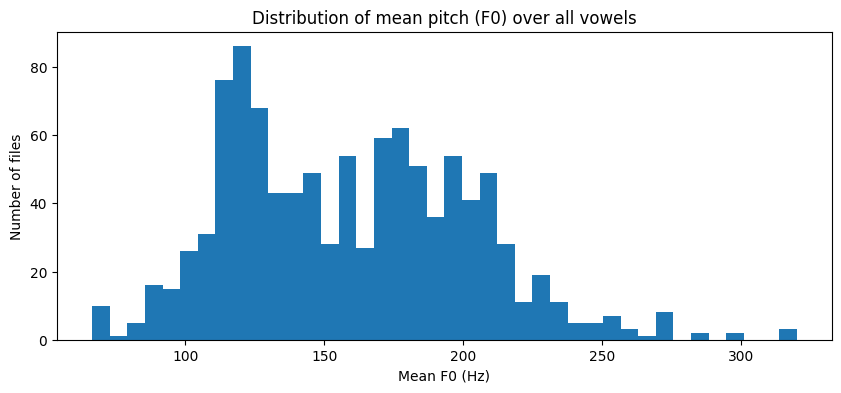

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(df_f0["mean_f0"], bins=40)
plt.xlabel("Mean F0 (Hz)")
plt.ylabel("Number of files")
plt.title("Distribution of mean pitch (F0) over all vowels")
plt.show()


We define a function that uses Praat (via parselmouth) to load a WAV file and compute three jitter measures (local, RAP, PPQ5) within a given pitch range (40–275 Hz), returning them as numeric features.

In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np

# These ranges usually work well for adult voices (male+female)
MIN_PITCH = 40   # Hz
MAX_PITCH = 275  # Hz

def extract_jitter_features(wav_path, min_pitch=MIN_PITCH, max_pitch=MAX_PITCH):
    """
    Returns: (jitter_local, jitter_rap, jitter_ppq5)
    Values are in ratio (Praat returns fractions, not percent).
    If extraction fails (too short/unvoiced/etc.), returns (nan, nan, nan).
    """
    try:
        sound = parselmouth.Sound(str(wav_path))
        point_process = call(sound, "To PointProcess (periodic, cc)", min_pitch, max_pitch)

        # Period bounds in seconds
        min_period = 1.0 / max_pitch
        max_period = 1.0 / min_pitch
        max_period_factor = 1.3  #Praat default

        # Praat jitter measures
        jitter_local = call(point_process, "Get jitter (local)", 0, 0, min_period, max_period, max_period_factor)
        jitter_rap   = call(point_process, "Get jitter (rap)",   0, 0, min_period, max_period, max_period_factor)
        jitter_ppq5  = call(point_process, "Get jitter (ppq5)",  0, 0, min_period, max_period, max_period_factor)

        return float(jitter_local), float(jitter_rap), float(jitter_ppq5)

    except Exception:
        return np.nan, np.nan, np.nan


In [ ]:
import pandas as pd

rows = []

for v in ["A","I","O","U","E"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        jl, jrap, jppq5 = extract_jitter_features(p)

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "jitter_local": jl,
            "jitter_rap": jrap,
            "jitter_ppq5": jppq5
        })

df_jitter = pd.DataFrame(rows)
df_jitter.head()


KeyboardInterrupt: 

In [ ]:
print("Total rows:", len(df_jitter))
print("Missing jitter_local:", df_jitter["jitter_local"].isna().sum())

out_csv = "/content/jitter_by_vowel.csv"
df_jitter.to_csv(out_csv, index=False)
print("Saved:", out_csv)


## Shimmer

This function uses Praat (via parselmouth) to load a WAV file, build a point process using a pitch range, then computes four shimmer measures (local, APQ3, APQ5, APQ11). If anything fails, it returns NaNs.

In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np

MIN_PITCH = 40  # already computed
MAX_PITCH = 275  # already computed

def extract_shimmer_features(wav_path, min_pitch=MIN_PITCH, max_pitch=MAX_PITCH):
    """
    Returns: (shimmer_local, shimmer_apq3, shimmer_apq5, shimmer_apq11)
    Praat returns ratios (fractions). If fails returns NaN.
    """
    try:
        sound = parselmouth.Sound(str(wav_path))
        point_process = call(sound, "To PointProcess (periodic, cc)", min_pitch, max_pitch)

        # Period bounds (seconds)
        min_period = 1.0 / max_pitch
        max_period = 1.0 / min_pitch

        # Praat typical defaults
        max_period_factor = 1.3
        max_amplitude_factor = 1.6

        # Shimmer measures require BOTH sound + point_process
        shimmer_local = call([sound, point_process], "Get shimmer (local)",
                             0, 0, min_period, max_period, max_period_factor, max_amplitude_factor)

        shimmer_apq3  = call([sound, point_process], "Get shimmer (apq3)",
                             0, 0, min_period, max_period, max_period_factor, max_amplitude_factor)

        shimmer_apq5  = call([sound, point_process], "Get shimmer (apq5)",
                             0, 0, min_period, max_period, max_period_factor, max_amplitude_factor)

        shimmer_apq11 = call([sound, point_process], "Get shimmer (apq11)",
                             0, 0, min_period, max_period, max_period_factor, max_amplitude_factor)

        return float(shimmer_local), float(shimmer_apq3), float(shimmer_apq5), float(shimmer_apq11)

    except Exception:
        return np.nan, np.nan, np.nan, np.nan


In [ ]:
import pandas as pd

rows = []

for v in ["A","I","O","U","E"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        sh_local, sh_apq3, sh_apq5, sh_apq11 = extract_shimmer_features(p)

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "shimmer_local": sh_local,
            "shimmer_apq3": sh_apq3,
            "shimmer_apq5": sh_apq5,
            "shimmer_apq11": sh_apq11
        })

df_shimmer = pd.DataFrame(rows)
df_shimmer.head()


In [ ]:
print("Total rows:", len(df_shimmer))
print("Missing shimmer_local:", df_shimmer["shimmer_local"].isna().sum())

out_csv = "/content/shimmer_by_vowel.csv"
df_shimmer.to_csv(out_csv, index=False)
print("Saved:", out_csv)


## HNR harmonic vs noise ratio

First we set the frequency band we already computed from spectrogram.

In [ ]:
BAND_FLOOR = 50
BAND_CEIL  = 4000


Defines a function that band-passes the audio, computes Harmonicity (HNR) with Praat, and returns the mean, median, and standard deviation of HNR in dB.

In [ ]:
import numpy as np
import parselmouth
from parselmouth.praat import call

MIN_PITCH = 40      # 40–275 F0 range
MAX_PITCH = 275

def extract_hnr_stats(wav_path,
                      band_floor=50, band_ceil=4000,
                      time_step=0.01,
                      pitch_floor=MIN_PITCH,
                      silence_threshold=0.1,
                      periods_per_window=1.0,
                      smoothing_hz=100):

    try:
        sound = parselmouth.Sound(str(wav_path))
        nyquist = sound.sampling_frequency / 2

        # Keep ceiling under Nyquist to avoid errors
        hi = min(float(band_ceil), float(nyquist) - 1.0)
        lo = float(band_floor)

        # Band-pass filtering (Hann band)
        snd_filt = call(sound, "Filter (pass Hann band)", lo, hi, smoothing_hz)

        # Harmonicity (cc) -> HNR values over time (dB)
        harm = call(snd_filt, "To Harmonicity (cc)", time_step, pitch_floor,
                    silence_threshold, periods_per_window)

        vals = harm.values.flatten()
        vals = vals[np.isfinite(vals)]
        vals = vals[vals > -190]   # drop undefined frames

        if len(vals) == 0:
            return np.nan, np.nan, np.nan

        return (float(np.mean(vals)),
                float(np.median(vals)),
                float(np.std(vals, ddof=1) if len(vals) > 1 else 0.0))

    except Exception:
        return np.nan, np.nan, np.nan


Loops over all vowel files, labels them as PD/HC/UNK, extracts HNR stats with the function, and stores everything in a DataFrame.

In [ ]:
import pandas as pd

rows = []

for v in ["A","I","O","U","E"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        h_mean, h_med, h_std = extract_hnr_stats(
            p,
            band_floor=BAND_FLOOR,
            band_ceil=BAND_CEIL,
            pitch_floor=50
        )

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "hnr_mean_db": h_mean,
            "hnr_median_db": h_med,
            "hnr_std_db": h_std
        })

df_hnr = pd.DataFrame(rows)
df_hnr.head()


In [ ]:
print("Total rows:", len(df_hnr))
print("Missing HNR mean:", df_hnr["hnr_mean_db"].isna().sum())

out_csv = "/content/hnr_stats_50_4000.csv"
df_hnr.to_csv(out_csv, index=False)
print("Saved:", out_csv)


## Correlation Dimension D2

install necessary library

In [ ]:
!pip -q install nolds scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 5.7 MB/s eta 0:00:00


**bandpass_filter**: This function applies a Butterworth band-pass filter to the signal, keeping only energy between 50 and 4000 Hz before later feature extraction. I used a 4th-order Butterworth because it gives a good trade-off between sharp attenuation of out-of-band noise and limited distortion of the speech signal; lower orders are too shallow, while much higher orders risk ringing and numerical issues, so 4th order is a standard, well-accepted choice in speech processing.


**prepare_signal_for_d2**:This function loads a WAV file, trims leading and trailing silence, keeps a fixed middle segment, band-passes it between 50–4000 Hz, resamples to 8 kHz, normalizes (zero mean, unit variance), optionally downsamples by taking every 2nd sample, discards signals that are too short, and returns a clean 1D signal ready for D2 computation.




In [ ]:
import numpy as np
import librosa
from scipy.signal import butter, filtfilt

def bandpass_filter(y, sr, low=50, high=4000, order=4):
    nyq = sr / 2
    high = min(high, nyq - 1)  # keep valid
    low = max(low, 1.0)
    if high <= low:
        return y

    b, a = butter(order, [low/nyq, high/nyq], btype="band")
    return filtfilt(b, a, y)

def prepare_signal_for_d2(wav_path,
                          target_sr=8000,      # Nyquist=4000, matches your ceiling
                          low=50, high=4000,
                          segment_sec=2.0,     # use consistent duration
                          top_db=25,           # from spectrogram we can see that noise zones values below -25 dB
                          decimate=2           # halves data size to speed up D2 with minimal loss of structure.
                         ):
    y, sr = librosa.load(str(wav_path), sr=None, mono=True)

    # trim silence
    y, _ = librosa.effects.trim(y, top_db=top_db)
    if len(y) < sr * 0.3:
        return None  # too short after trimming

    # take middle segment of fixed length
    seg_len = int(segment_sec * sr)
    if len(y) >= seg_len:
        start = (len(y) - seg_len) // 2
        y = y[start:start+seg_len]

    # bandpass on original sr, then resample
    y = bandpass_filter(y, sr, low=low, high=high)
    if sr != target_sr:
        y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
        sr = target_sr

    # normalize (helps numeric stability)
    y = y - np.mean(y)
    std = np.std(y)
    if std > 0:
        y = y / std

    # decimate for speed (keeps workflow fast)
    if decimate and decimate > 1:
        y = y[::decimate]

    # final sanity
    if len(y) < 500:
        return None

    return y, sr


This function estimates a characteristic correlation time (τ) of the signal: it computes the normalized autocorrelation of x and returns the first lag where the autocorrelation drops below 1/e; if the signal is flat it returns 1, and if it never drops below 1/e within the search it returns 10.

In [ ]:
def estimate_tau_autocorr(x, max_lag=300):
    x = np.asarray(x)
    x = x - x.mean()
    if np.std(x) == 0:
        return 1

    ac = np.correlate(x, x, mode="full")[len(x)-1:]
    ac = ac / ac[0]

    # pick first lag where autocorr drops below 1/e
    thresh = 1/np.e
    for lag in range(1, min(max_lag, len(ac))):
        if ac[lag] < thresh:
            return lag
    return 10  # fallback


This function computes the correlation dimension D2 of a voice signal. It first calls prepare_signal_for_d2 to get a cleaned, band-passed, fixed-length, normalized waveform, then estimates a suitable time delay τ with estimate_tau_autocorr, and finally uses nolds.corr_dim with embedding dimension 10 and that lag to estimate D2; if anything fails, it returns NaN

In [ ]:
import nolds

def compute_d2(wav_path,
               emb_dim=10,
               segment_sec=2.0,
               low=50, high=4000,
               target_sr=8000,
               decimate=2):
    prep = prepare_signal_for_d2(wav_path, target_sr=target_sr, low=low, high=high,
                                 segment_sec=segment_sec, decimate=decimate)
    if prep is None:
        return np.nan

    x, _ = prep
    tau = estimate_tau_autocorr(x, max_lag=300)

    try:
        d2 = nolds.corr_dim(x, emb_dim=emb_dim, lag=tau)
        return float(d2)
    except Exception:
        return np.nan


compute D2 for each vowel and store D2 for each vowel in an independant csv file.

In [ ]:
import pandas as pd

rows = []
for v in ["A"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        d2 = compute_d2(p, emb_dim=10, segment_sec=2.0, low=50, high=4000, target_sr=8000, decimate=2)

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "d2": d2
        })

df_d2 = pd.DataFrame(rows)
df_d2.head()


KeyboardInterrupt: 

In [ ]:
out_csv = "/content/d2_vowel_A.csv"
df_d2.to_csv(out_csv, index=False)
print("Saved:", out_csv)


In [ ]:
import pandas as pd

rows = []
for v in ["I"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        d2 = compute_d2(p, emb_dim=10, segment_sec=2.0, low=50, high=4000, target_sr=8000, decimate=2)

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "d2": d2
        })

df_d2 = pd.DataFrame(rows)
df_d2.head()
out_csv = "/content/d2_vowel_I.csv"
df_d2.to_csv(out_csv, index=False)
print("Saved:", out_csv)


In [ ]:
import pandas as pd

rows = []
for v in ["O"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        d2 = compute_d2(p, emb_dim=10, segment_sec=2.0, low=50, high=4000, target_sr=8000, decimate=2)

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "d2": d2
        })

df_d2 = pd.DataFrame(rows)
df_d2.head()
out_csv = "/content/d2_vowel_O.csv"
df_d2.to_csv(out_csv, index=False)
print("Saved:", out_csv)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

Saved: /content/d2_vowel_O.csv


In [ ]:
import pandas as pd

rows = []
for v in ["U"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        d2 = compute_d2(p, emb_dim=10, segment_sec=2.0, low=50, high=4000, target_sr=8000, decimate=2)

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "d2": d2
        })

df_d2 = pd.DataFrame(rows)
df_d2.head()
out_csv = "/content/d2_vowel_U.csv"
df_d2.to_csv(out_csv, index=False)
print("Saved:", out_csv)


In [ ]:
import pandas as pd

rows = []
for v in ["E"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        d2 = compute_d2(p, emb_dim=10, segment_sec=2.0, low=50, high=4000, target_sr=8000, decimate=2)

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "d2": d2
        })

df_d2 = pd.DataFrame(rows)
df_d2.head()
out_csv = "/content/d2_vowel_E.csv"
df_d2.to_csv(out_csv, index=False)
print("Saved:", out_csv)


Saved: /content/d2_vowel_E.csv


## PPE  pitch period entropy

Loads a file, trims silence, computes the sequence of pitch values (fundamental frequency, F0 in Hz) over time (F0 contour) within your tuned pitch range (40–275 Hz), and returns only voiced F0 values for PPE.

In [ ]:
import numpy as np
import librosa

MIN_PITCH = 40   # use the same min/max pitch you derived
MAX_PITCH = 275  # from your F0 analysis

def get_f0_for_ppe(wav_path,
                   fmin=MIN_PITCH, fmax=MAX_PITCH,
                   top_db=25): ## from spectrogram we can see that noise zones values below -25 dB
    y, sr = librosa.load(str(wav_path), sr=None, mono=True)

    # trim silence (same idea as before)
    y, _ = librosa.effects.trim(y, top_db=top_db)
    if len(y) < sr * 0.3:
        return None, None  # too short

    hop_length = int(0.01 * sr)  # ~10 ms frames
    f0 = librosa.yin(y, fmin=fmin, fmax=fmax, sr=sr, hop_length=hop_length)

    # keep only voiced frames
    f0 = f0[f0 > 0]

    if len(f0) < 5:
        return None, None

    return f0, sr


Takes the F0 contour, converts it to pitch periods, looks at the distribution of normalized period changes, and returns the (normalized) Shannon entropy: PPE.

In [ ]:
def compute_ppe_from_f0(f0, nbins=20, eps=1e-8, normalize=True):

    f0 = np.asarray(f0, dtype=float)
    f0 = f0[f0 > 0]
    if len(f0) < 5:
        return np.nan

    # convert to periods
    T = 1.0 / f0
    dT = np.diff(T)

    # normalize period changes
    std = np.std(dT)
    if std <= 0:
        return np.nan
    z = dT / std

    # histogram of normalized changes
    hist, _ = np.histogram(z, bins=nbins, density=True)
    p = hist / (np.sum(hist) + eps)
    p = p[p > 0]

    if len(p) == 0:
        return np.nan

    # Shannon entropy
    H = -np.sum(p * np.log2(p))

    if normalize and nbins > 1:
        H = H / np.log2(nbins)  # scale to [0,1]

    return float(H)


For one WAV file, this gets a clean F0 contour with your pitch bounds, then computes and returns PPE as a single scalar.

In [ ]:
def compute_ppe(wav_path,
                fmin=MIN_PITCH, fmax=MAX_PITCH,
                top_db=25,
                nbins=20):
    f0, _ = get_f0_for_ppe(wav_path, fmin=fmin, fmax=fmax, top_db=top_db)
    if f0 is None:
        return np.nan
    return compute_ppe_from_f0(f0, nbins=nbins, normalize=True)


Loops over all vowel files (A, I, O, U, E), labels each as PD/HC/UNK, computes PPE for each recording, and stores the results in a DataFrame.

In [ ]:
import pandas as pd

rows_ppe = []

for v in ["A", "I", "O", "U", "E"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        ppe_val = compute_ppe(
            p,
            fmin=MIN_PITCH,
            fmax=MAX_PITCH,
            top_db=25,
            nbins=20
        )

        rows_ppe.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "PPE": ppe_val
        })

df_ppe = pd.DataFrame(rows_ppe)
df_ppe.head()


/tmp/ipython-input-3497832459.py:18: UserWarning: With fmin=40.000, sr=44100 and frame_length=2048, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=43.066 or frame_length=2207.
  f0 = librosa.yin(y, fmin=fmin, fmax=fmax, sr=sr, hop_length=hop_length)


vowel label            file  \
0     A    HC  HC_A1_0034.wav   
1     A    HC  HC_A1_0036.wav   
2     A    HC  HC_A1_0045.wav   
3     A    HC  HC_A1_0048.wav   
4     A    HC  HC_A1_0049.wav   

                                                path       PPE  
0  /content/phonation_extracted/phonation audios/...  0.805259  
1  /content/phonation_extracted/phonation audios/...  0.897488  
2  /content/phonation_extracted/phonation audios/...  0.800554  
3  /content/phonation_extracted/phonation audios/...  0.870039  
4  /content/phonation_extracted/phonation audios/...  0.913029

In [ ]:
out_csv = "/content/ppe.csv"
df_ppe.to_csv(out_csv, index=False)
print("Saved:", out_csv)

Saved: /content/ppe.csv


## CPP cepstral peak prominence

Defines core parameters for CPP: import libraries, set the analysis band (50–4000 Hz), resampling rate (8 kHz), FFT/window/hop sizes, and the pitch range (40–275 Hz) used to locate the cepstral peak.

In [ ]:
import numpy as np
import librosa
from scipy.signal import butter, filtfilt
import pandas as pd

FLOOR_HZ = 50
CEIL_HZ  = 4000

TARGET_SR = 8000      # Nyquist = 4000 (matches your ceiling)
N_FFT = 2048
HOP = 256
WIN = 2048

F0_MIN = 40
F0_MAX = 275


**bandpass_filter** keeps only 50–4000 Hz with a 4th-order Butterworth filter.


**prepare_signal_for_cpp** loads the WAV, trims silence, optionally keeps a middle segment, band-passes it, resamples to 8 kHz, normalizes it, and returns a clean signal for CPP.

In [ ]:
def bandpass_filter(y, sr, low=50, high=4000, order=4):
    nyq = sr / 2
    high = min(high, nyq - 1)  # keep valid
    low = max(low, 1.0)
    if high <= low:
        return y
    b, a = butter(order, [low/nyq, high/nyq], btype="band")
    return filtfilt(b, a, y)

def prepare_signal_for_cpp(wav_path, target_sr=8000, low=50, high=4000, top_db=25, segment_sec=None):
    y, sr = librosa.load(str(wav_path), sr=None, mono=True)

    # trim silence
    y, _ = librosa.effects.trim(y, top_db=top_db)
    if len(y) < int(0.3 * sr):
        return None, None

    # (optional) fixed middle segment for consistency
    if segment_sec is not None:
        seg_len = int(segment_sec * sr)
        if len(y) >= seg_len:
            start = (len(y) - seg_len) // 2
            y = y[start:start + seg_len]

    # bandpass 50–4000
    y = bandpass_filter(y, sr, low=low, high=high)

    # resample so Nyquist=4000
    if sr != target_sr:
        y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
        sr = target_sr

    # normalize
    y = y - np.mean(y)
    s = np.std(y)
    if s > 0:
        y = y / s

    return y, sr


**cpp_per_frame** slides a Hanning window over the signal, computes the real cepstrum for each frame, searches the cepstral peak in the quefrency region corresponding to 40-275 Hz (pitch range), fits a linear baseline there, and returns CPP values (peak – baseline) for all frames.

In [ ]:
def cpp_per_frame(y, sr, n_fft=2048, hop=256, win=2048, f0min=F0_MIN, f0max=F0_MAX):
    # quefrency range (seconds) corresponding to pitch range
    qmin = 1.0 / f0max
    qmax = 1.0 / f0min

    # cepstrum sample indices
    kmin = int(np.floor(qmin * sr))
    kmax = int(np.ceil(qmax * sr))
    kmax = min(kmax, win//2 - 1)

    if kmax <= kmin + 2:
        return np.array([])

    cpp_vals = []

    for start in range(0, len(y) - win + 1, hop):
        frame = y[start:start+win] * np.hanning(win)

        # power spectrum -> log -> real cepstrum
        spec = np.abs(np.fft.rfft(frame, n=n_fft))**2
        log_spec = np.log(spec + 1e-12)
        cep = np.fft.irfft(log_spec, n=n_fft)  # real cepstrum

        # use a local quefrency range
        q_idx = np.arange(kmin, kmax)
        q_sec = q_idx / sr
        c = cep[q_idx]

        # peak within pitch-quefrency
        peak_i = np.argmax(c)
        peak_q = q_sec[peak_i]
        peak_v = c[peak_i]

        # regression baseline over the same range
        # baseline(q) = a*q + b
        a, b = np.polyfit(q_sec, c, 1)
        baseline_at_peak = a * peak_q + b

        cpp_vals.append(peak_v - baseline_at_peak)

    return np.array(cpp_vals, dtype=float)


**extract_cpp_stats** uses the prep + CPP functions to get all CPP values for a file, filters invalid ones, and returns mean, median, and standard deviation of CPP as three scalar features.

In [ ]:
def extract_cpp_stats(wav_path, segment_sec=None):
    y, sr = prepare_signal_for_cpp(
        wav_path,
        target_sr=TARGET_SR,
        low=FLOOR_HZ,
        high=CEIL_HZ,
        top_db=25,
        segment_sec=segment_sec
    )
    if y is None:
        return np.nan, np.nan, np.nan

    vals = cpp_per_frame(y, sr, n_fft=N_FFT, hop=HOP, win=WIN, f0min=F0_MIN, f0max=F0_MAX)
    vals = vals[np.isfinite(vals)]
    if len(vals) == 0:
        return np.nan, np.nan, np.nan

    return float(np.mean(vals)), float(np.median(vals)), float(np.std(vals, ddof=1) if len(vals) > 1 else 0.0)


Loops over all vowel recordings (A, I, O, U, E), infers PD/HC/UNK from filenames, computes CPP stats for each file, and builds a DataFrame df_cpp with vowel, label, filename, path, and CPP mean/median/std.

In [ ]:
rows = []

for v in ["A","I","O","U","E"]:
    for p in vowel_files.get(v, []):
        name_upper = p.name.upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        cpp_mean, cpp_med, cpp_std = extract_cpp_stats(p, segment_sec=None)  # or segment_sec=2.0 for fixed length

        rows.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "cpp_mean": cpp_mean,
            "cpp_median": cpp_med,
            "cpp_std": cpp_std
        })

df_cpp = pd.DataFrame(rows)
df_cpp.head()


vowel label            file  \
0     A    HC  HC_A1_0034.wav   
1     A    HC  HC_A1_0036.wav   
2     A    HC  HC_A1_0045.wav   
3     A    HC  HC_A1_0048.wav   
4     A    HC  HC_A1_0049.wav   

                                                path  cpp_mean  cpp_median  \
0  /content/phonation_extracted/phonation audios/...  0.556530    0.553383   
1  /content/phonation_extracted/phonation audios/...  0.837128    0.838703   
2  /content/phonation_extracted/phonation audios/...  0.448616    0.440344   
3  /content/phonation_extracted/phonation audios/...  0.930661    0.947677   
4  /content/phonation_extracted/phonation audios/...  1.206878    1.213086   

    cpp_std  
0  0.097189  
1  0.142133  
2  0.095297  
3  0.154883  
4  0.121304

In [ ]:
out_csv = "/content/cpp.csv"
df_cpp.to_csv(out_csv, index=False)
print("Saved:", out_csv)

Saved: /content/cpp.csv


## VSA  vowel space area

When you say a vowel, your vocal cords produce a basic tone (F0), and your vocal tract filters/amplifies certain frequencies.

Those amplified bands are the formants: F1, F2, F3… (measured in Hz).

F1 is mainly related to how open your mouth is (jaw height).

F2 is mainly related to where your tongue is (front vs back).

F3 is mainly influenced more by lip rounding, the shape of the front cavity, and sometimes tongue-tip/“r-coloring” effects (like in English /r/).


Max formant (MAX_FORMANT):
This is the upper frequency limit Praat uses when estimating formants (F1, F2, F3…). It tells the algorithm “don’t look for formant resonances above this.” If it’s too low, Praat may miss the real F2/F3; if it’s too high, it may create unstable/noisy formant tracks.

In the 2 blocks of code we extract many F2 and F3 formant values from the stable middle portion(of the recording) of the vowels using a high ceiling, then use the 95th percentile (mainly of F3) plus a small margin as a data-driven MAX_FORMANT so Praat’s formant search is high enough to include real resonances but not so high that it becomes unstable.

In [ ]:
import numpy as np
import librosa
import parselmouth
from parselmouth.praat import call

def collect_f2_f3_stats_trimmed(wav_paths,
                                max_formant_try=4500.0,
                                n_formants=5,
                                time_step=0.01,
                                win_length=0.025,
                                preemp_from=50.0,
                                top_db=25):
    f2_all, f3_all = [], []
    processed = 0
    valid_files = 0

    for p in wav_paths:
        processed += 1
        try:
            y, sr = librosa.load(str(p), sr=None, mono=True)
            y, _ = librosa.effects.trim(y, top_db=top_db)
            if len(y) < int(0.3 * sr):
                continue

            snd = parselmouth.Sound(y, sr)

            nyq = sr / 2.0
            mf = min(float(max_formant_try), float(nyq) - 50.0)
            if mf < 1500:
                continue

            # ✅ Correct argument order:
            formant_obj = call(snd, "To Formant (burg)",
                               time_step, n_formants, mf, win_length, preemp_from)

            dur = snd.duration
            t_vals = np.arange(0.3 * dur, 0.7 * dur, time_step)

            got_any = False
            for t in t_vals:
                f2 = call(formant_obj, "Get value at time", 2, t, "Hertz", "Linear")
                f3 = call(formant_obj, "Get value at time", 3, t, "Hertz", "Linear")

                if np.isfinite(f2) and f2 > 0:
                    f2_all.append(float(f2)); got_any = True
                if np.isfinite(f3) and f3 > 0:
                    f3_all.append(float(f3)); got_any = True

            if got_any:
                valid_files += 1

        except Exception:
            continue

    print(f"Processed files: {processed}")
    print(f"Files with valid formants: {valid_files}")
    print(f"Collected samples: F2={len(f2_all)}, F3={len(f3_all)}")

    if len(f2_all) == 0 or len(f3_all) == 0:
        return None

    f2_all = np.array(f2_all); f3_all = np.array(f3_all)

    stats = {
        "F2_p95": float(np.percentile(f2_all, 95)),
        "F3_p95": float(np.percentile(f3_all, 95)),
        "F2_max": float(np.max(f2_all)),
        "F3_max": float(np.max(f3_all)),
    }
    suggested = stats["F3_p95"] + 200.0

    print("F2_p95:", stats["F2_p95"])
    print("F3_p95:", stats["F3_p95"])
    print("Suggested MAX_FORMANT:", suggested)

    return stats, suggested


In [ ]:
all_corner = vowel_files["A"] + vowel_files["I"] + vowel_files["U"]

res = collect_f2_f3_stats_trimmed(all_corner, max_formant_try=4500.0, top_db=25)

if res is None:
    print("Still no samples. Try max_formant_try=5500 and/or top_db=20.")
else:
    stats, suggested_MAX_FORMANT = res


Processed files: 603
Files with valid formants: 603
Collected samples: F2=98422, F3=98422
F2_p95: 2520.761479268786
F3_p95: 3068.343129934943
Suggested MAX_FORMANT: 3268.343129934943


We will set MAX_FORMANT to 3300.

t_mid is the time point (in seconds) inside the recording where we decide to measure formants. We will take t_mid to be the time at middle of recording because it is stable in most cases.

sets imports + constants for Praat formant extraction.

In [ ]:
import numpy as np
import pandas as pd
import librosa
import parselmouth
from parselmouth.praat import call

# ---------- CONSTANTS ----------
MAX_FORMANT = 3300.0   # Hz
N_FORMANTS  = 5
TIME_STEP   = 0.01     # s
WIN_LENGTH  = 0.025    # s
PREEMP_FROM = 50.0     # Hz
TOP_DB = 25            # (only used if you later decide to trim; not required here)


Vowel Space Area (tVSA)

Vowel Space Area (often called tVSA when computed as a triangle) is an acoustic measure of how “wide” a speaker’s vowel articulation space is. It is computed from the first two formants (F1, F2) of the corner vowels — commonly /i/, /u/, and /a/ (or /ɑ/) — by plotting each corner vowel as a point in the (F1, F2) plane and computing the area of the triangle formed by those three points. A smaller area indicates more centralized vowels (reduced articulatory working space), which is commonly observed in dysarthria and Parkinson’s disease.

Interpretation in PD: decreased tVSA reflects reduced range of tongue and jaw movement, leading to less distinct vowel targets and more centralized vowel production.

Practical note: tVSA is simple and robust; many PD studies (e.g., Skodda et al., 2012) report smaller tVSA in PD compared with healthy controls.

extracts F1/F2 at the midpoint of the recording using Praat Burg formants

In [ ]:
def extract_mid_formants(wav_path,
                         max_formant=MAX_FORMANT,
                         n_formants=N_FORMANTS,
                         time_step=TIME_STEP,
                         win_length=WIN_LENGTH,
                         preemp_from=PREEMP_FROM):
    try:
        snd = parselmouth.Sound(str(wav_path))
        duration = snd.duration
        if duration <= 0.2:
            return np.nan, np.nan

        t_mid = duration / 2.0

        # keep max_formant under Nyquist
        nyq = snd.sampling_frequency / 2.0
        mf = min(float(max_formant), float(nyq) - 50.0)
        if mf <= 500:
            return np.nan, np.nan

        # ✅ Praat order: time_step, number_of_formants, max_formant, window_length, preemphasis
        formant_obj = call(snd, "To Formant (burg)",
                           time_step, int(n_formants), mf, win_length, preemp_from)

        f1 = call(formant_obj, "Get value at time", 1, t_mid, "Hertz", "Linear")
        f2 = call(formant_obj, "Get value at time", 2, t_mid, "Hertz", "Linear")

        if not np.isfinite(f1) or not np.isfinite(f2) or f1 <= 0 or f2 <= 0:
            return np.nan, np.nan

        return float(f1), float(f2)

    except Exception:
        return np.nan, np.nan


loops over A/I/U files, extracts mid-vowel F1/F2 for each, and stores results in a DataFrame.

In [ ]:
# vowel_files must already exist like: vowel_files["A"] = [Path(...), ...]
rows_formants = []

for v in ["A", "I", "U"]:
    for p in vowel_files.get(v, []):
        name_upper = str(p.name).upper()
        label = "PD" if name_upper.startswith("PD") else ("HC" if name_upper.startswith("HC") else "UNK")

        f1, f2 = extract_mid_formants(p)

        rows_formants.append({
            "vowel": v,
            "label": label,
            "file": p.name,
            "path": str(p),
            "F1_Hz": f1,
            "F2_Hz": f2
        })

df_formants = pd.DataFrame(rows_formants)

# keep only valid rows
df_formants = df_formants.dropna(subset=["F1_Hz", "F2_Hz"])
df_formants = df_formants[(df_formants["F1_Hz"] > 0) & (df_formants["F2_Hz"] > 0)]

df_formants.head()


vowel label            file  \
0     A    HC  HC_A1_0034.wav   
1     A    HC  HC_A1_0036.wav   
2     A    HC  HC_A1_0045.wav   
3     A    HC  HC_A1_0048.wav   
4     A    HC  HC_A1_0049.wav   

                                                path       F1_Hz        F2_Hz  
0  /content/phonation_extracted/phonation audios/...  576.921312   874.392367  
1  /content/phonation_extracted/phonation audios/...  476.740838   896.246188  
2  /content/phonation_extracted/phonation audios/...  569.653613  1167.063755  
3  /content/phonation_extracted/phonation audios/...  803.632783  1325.437966  
4  /content/phonation_extracted/phonation audios/...  515.060239   865.754725

builds speaker_id, computes mean formants per speaker per vowel, and keeps one PD/HC label per speaker.

In [ ]:
def compute_vsa_triangle(f1_i, f2_i, f1_a, f2_a, f1_u, f2_u):
    if any(np.isnan([f1_i, f2_i, f1_a, f2_a, f1_u, f2_u])):
        return np.nan

    x1, y1 = f1_i, f2_i
    x2, y2 = f1_a, f2_a
    x3, y3 = f1_u, f2_u

    return float(0.5 * abs(
        x1 * (y2 - y3) +
        x2 * (y3 - y1) +
        x3 * (y1 - y2)
    ))


computes VSA as the triangle area in the (F1, F2) plane using /i/, /a/, /u/.

## VAI vowel articulation index

computes VAI from corner-vowel formants (/i/, /a/, /u/) using the standard ratio formula.

Vowel Articulation Index (VAI)

VAI is a formant-based index designed to quantify vowel centralization while being less sensitive to raw speaker differences (such as vocal-tract size). In Parkinson’s disease research, VAI is computed from F1 and F2 values of the corner vowels (/i/, /a/, /u/) using a ratio that places more weight on how distinct the corner vowels are relative to each other. When vowel centralization occurs, the numerator tends to decrease while the denominator tends to increase, so VAI decreases as articulation becomes smaller or less distinct.

Common interpretation: lower VAI indicates increased vowel centralization (reduced articulatory precision), which has been reported in PD populations.

Practical note: several formula variants exist; Skodda et al. (2012) and related PD studies use versions of VAI/tVSA tailored for cross-speaker comparisons.

In [ ]:
def compute_vai(F1_i, F2_i, F1_a, F2_a, F1_u, F2_u):
    vals = [F1_i, F2_i, F1_a, F2_a, F1_u, F2_u]
    if any(np.isnan(vals)):
        return np.nan

    denom = F2_u + F1_i
    if denom <= 0 or not np.isfinite(denom):
        return np.nan

    return float((F2_i + F1_a) / denom)


ensures each recording is assigned to a speaker ID, then averages F1/F2 per (speaker, vowel).

In [ ]:
# Person key = LAST 4 digits in filename (your rule)
df_formants["person_id"] = df_formants["file"].astype(str).str.extract(r'(\d{4})(?!.*\d)', expand=False)
df_formants["person_id"] = df_formants["person_id"].fillna(df_formants["file"].astype(str))

# Average F1/F2 per (person, vowel)
grouped = (
    df_formants
    .groupby(["person_id", "vowel"], as_index=False)[["F1_Hz", "F2_Hz"]]
    .mean()
)

# Optional label per person (mode)
person_label = (df_formants.groupby("person_id")["label"]
                .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else s.iloc[0])
                .reset_index())

print("Persons found:", grouped["person_id"].nunique())
print("Persons with A:", grouped[grouped["vowel"]=="A"]["person_id"].nunique(),
      "| I:", grouped[grouped["vowel"]=="I"]["person_id"].nunique(),
      "| U:", grouped[grouped["vowel"]=="U"]["person_id"].nunique())


Persons found: 107
Persons with A: 107 | I: 107 | U: 102


reshapes formant averages so each speaker has A/I/U values, then computes one VAI value per speaker.

In [ ]:
# Pivot for easy access
wide = grouped.pivot(index="person_id", columns="vowel", values=["F1_Hz", "F2_Hz"])

# ---------- VSA per person ----------
rows_vsa = []
for pid in wide.index:
    try:
        f1_i = wide.loc[pid, ("F1_Hz", "I")]
        f2_i = wide.loc[pid, ("F2_Hz", "I")]
        f1_a = wide.loc[pid, ("F1_Hz", "A")]
        f2_a = wide.loc[pid, ("F2_Hz", "A")]
        f1_u = wide.loc[pid, ("F1_Hz", "U")]
        f2_u = wide.loc[pid, ("F2_Hz", "U")]
    except KeyError:
        continue

    rows_vsa.append({"person_id": pid, "VSA": compute_vsa_triangle(f1_i, f2_i, f1_a, f2_a, f1_u, f2_u)})

df_vsa = pd.DataFrame(rows_vsa).merge(person_label, on="person_id", how="left")
out_vsa = "/content/vsa_features.csv"
df_vsa.to_csv(out_vsa, index=False)
print("Saved:", out_vsa)
df_vsa.head()


Saved: /content/vsa_features.csv


person_id           VSA label
0      0004   4703.193205    PD
1      0006           NaN    PD
2      0007   6094.366798    PD
3      0008  82408.765112    PD
4      0009   1503.512131    PD

In [ ]:
# ---------- VAI per person ----------
rows_vai = []
for pid in wide.index:
    try:
        F1_i = wide.loc[pid, ("F1_Hz", "I")]
        F2_i = wide.loc[pid, ("F2_Hz", "I")]
        F1_a = wide.loc[pid, ("F1_Hz", "A")]
        F2_a = wide.loc[pid, ("F2_Hz", "A")]
        F1_u = wide.loc[pid, ("F1_Hz", "U")]
        F2_u = wide.loc[pid, ("F2_Hz", "U")]
    except KeyError:
        continue

    rows_vai.append({"person_id": pid, "VAI": compute_vai(F1_i, F2_i, F1_a, F2_a, F1_u, F2_u)})

df_vai = pd.DataFrame(rows_vai).merge(person_label, on="person_id", how="left")
out_vai = "/content/vai_features.csv"
df_vai.to_csv(out_vai, index=False)
print("Saved:", out_vai)
df_vai.head()


Saved: /content/vai_features.csv


person_id       VAI label
0      0004  0.958723    PD
1      0006       NaN    PD
2      0007  0.807517    PD
3      0008  2.225067    PD
4      0009  1.033264    PD

## References

[1] S. Skodda, W. Grönheit, and U. Schlegel, "Impairment of vowel articulation as a possible marker of disease progression in Parkinson's disease," PLoS ONE, vol. 7, no. 2, p. e32132, 2012, doi: 10.1371/journal.pone.0032132.

[2] S. Skodda, W. Visser, and U. Schlegel, "Vowel articulation in Parkinson's disease," J. Voice, vol. 25, no. 4, pp. 467–472, 2011, doi: 10.1016/j.jvoice.2010.01.009.

[3] S. Sapir, L. O. Ramig, J. L. Spielman, and C. Fox, "Formant centralization ratio: a proposal for a new acoustic measure of dysarthric speech," J. Speech Lang. Hear. Res., vol. 53, no. 1, pp. 114–125, 2010, doi: 10.1044/1092-4388(2009/08-0184).

[4] H. Wright and V. Aharonson, "Vocal feature changes for monitoring Parkinson's disease progression—A systematic review," Brain Sci., vol. 15, no. 3, p. 320, 2025, doi: 10.3390/brainsci15030320. [Online]. Available: https://pmc.ncbi.nlm.nih.gov/articles/PMC11939921/

[5] M. A. Little, P. E. McSharry, E. J. Hunter, J. Spielman, and L. O. Ramig, "Suitability of dysphonia measurements for telemonitoring of Parkinson's disease," IEEE Trans. Biomed. Eng., vol. 56, no. 4, pp. 1015–1022, 2009, doi: 10.1109/TBME.2008.2005954. [Online]. Available: https://pmc.ncbi.nlm.nih.gov/articles/PMC3051371/

[6] S. N. Awan, N. Roy, and J. J. Jiang, "Nonlinear dynamic analysis of disordered voice: The relationship between the correlation dimension (D2) and pre-/post-treatment change in perceived dysphonia severity," J. Voice, vol. 24, no. 3, pp. 285–293, 2010, doi: 10.1016/j.jvoice.2008.11.003.

[7] J. Lally and E. Gianotti, "Measuring vocal jitter: Continuous speech vs. sustained vowels," in Proc. 2012 Univ. Montana Conf. Undergraduate Res., Missoula, MT, 2012. [Online]. Available: https://scholarworks.umt.edu/umcur/2012/poster_2/4

[8] J. Fernandes, F. Teixeira, V. Guedes, A. Junior, and J. P. Teixeira, "Harmonic to noise ratio measurement – Selection of window and length," Procedia Comput. Sci., vol. 138, pp. 280–285, 2018, doi: 10.1016/j.procs.2018.10.040.

[9] Phonalyze, "Understanding shimmer in voice assessment with Phonalyze," Phonalyze Blog, 2025. [Online]. Available: https://blog.phonalyze.com/understanding-shimmer-in-voice-assessment-with-phonalyze/